In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Q1.

1. The key features of the aforementioned dataset, along with their importance in predicting wine quality, are as follows:

2. Fixed Acidity: Influences the wine's structure and taste.

3. Volatile Acidity: Should be at appropriate levels to avoid undesirable vinegary taste.

4. Citric Acid: Adds freshness and a citrusy flavor to the wine.

5. Residual Sugar: Affects wine sweetness.

6. Chlorides: Influences taste and mouthfeel.

7. Free Sulfur Dioxide: Acts as an antimicrobial and antioxidant compound.

8. Total Sulfur Dioxide: Important for wine preservation.

9. Density: Reflects concentration and is related to sugar and alcohol content.

10. pH: Affects acidity, stability, and taste.

11. Sulfates: Used as a preservative and antioxidant.

12. Alcohol: Contributes to body, flavor, and sweetness.

13. Quality (Target Variable): Represents wine quality.

## These features collectively help predict and improve wine quality.

In [5]:
#Q2.

missing_data = df.isnull().sum()

In [6]:
missing_data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Insight(s) or Observation(s): 

### Here, missing_data returns 0 for each column. It means there are no missing values in the dataset, and we don't need to perform any imputation. 
### In this case, we can skip the imputation step and continue with our analysis, as there are no missing data points to handle.

## If this dataset would have any missing values, I would have handled it using Mean/Median/Mode Imputation.

### For, Mean/Median/Mode Imputation, below are some of the advantages and disadvantages.

### Advantages:
### Simple and quick.
### Preserves the central tendency of the data.

### Disadvantages:
### May introduce bias, especially if missing data is not missing at random.
### Ignores relationships between variables.

In [7]:
# Q3.

df1 = pd.read_csv('stud.csv')

In [8]:
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# The dataset contains several features that could influence students' performance in exams:

1. Gender: Analyze gender-based differences using statistical tests (e.g., t-tests) to compare mean scores in subjects like math, reading, and writing for male and female students.

2. Race/Ethnicity: Group students by race/ethnicity and examine score distributions across different groups. Statistical tests can help identify significant differences.

3. Parental Education: Investigate the impact of parents' education levels on students' scores. We can use one-way ANOVA tests or regression analysis for this purpose.

4. Lunch Type: Consider the influence of lunch type (standard or free/reduced) on scores. We can employ t-tests to compare the scores of these two groups.

5. Test Preparation Course: Evaluate the effect of completing a test preparation course. Perform t-tests to compare scores between students who completed the course and those who didn't.

In [9]:
df1.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
# Insight
# No missing values found in the dataset.

In [11]:
df1.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- From the generated numerical data, all means are very close to each other - between 66 and 69
- All standard deviation are also close - between 14.6 - 15.19
- While there is a minimum of 0 for maths, reading_score and writing_score are having 17 and 10 values respectively.

In [12]:
# Insights

# Female students tend to perform better than the male students

In [13]:
# Bifurcate numerical and categorical features
numerical_features = [feature for feature in df1.columns if df1[feature].dtype!='O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype=='O']

In [14]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [15]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [16]:
# Aggregate the total score with mean
df1['total_score'] = (df1['math_score'] + df1['reading_score'] + df1['writing_score'])
df1['avg_score'] = (df1['total_score']/3)
df1.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


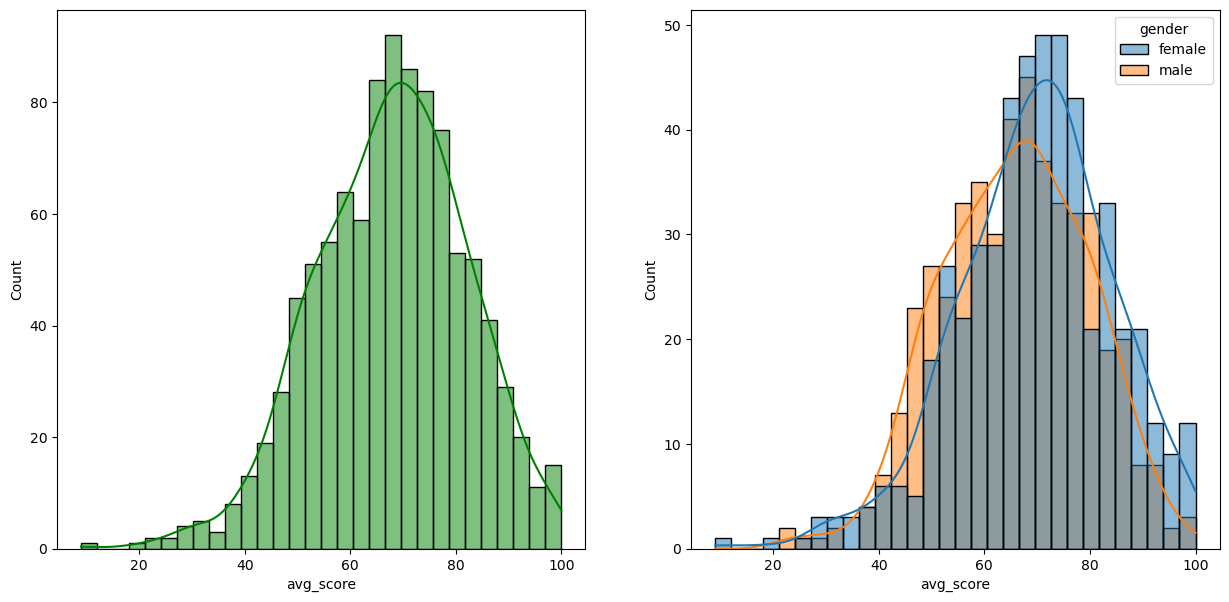

In [17]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df1,x = 'avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data = df1,x = 'avg_score',bins=30,kde=True,hue='gender')
plt.show()

## Insights
- Female students tend to perform well than male students

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

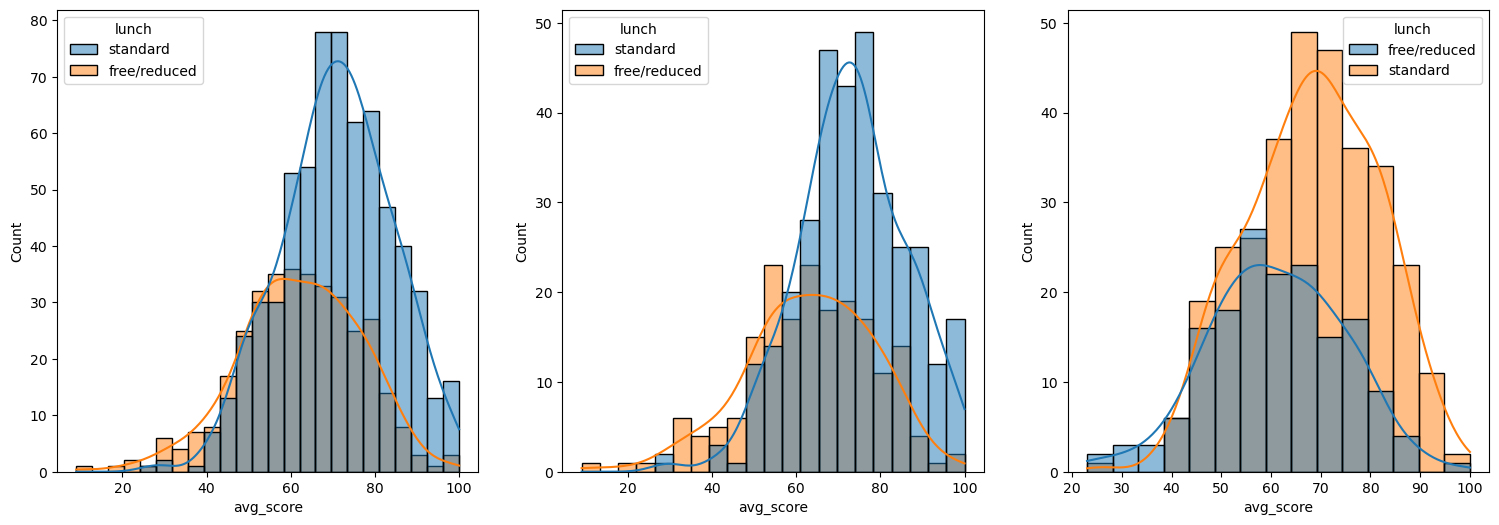

In [18]:
plt.subplots(1, 3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df1, x = 'avg_score', kde=True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df1[df1.gender=='female'], x = 'avg_score', kde=True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df1[df1.gender=='male'], x = 'avg_score', kde=True, hue = 'lunch')

## Insights

- Standard lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male or female

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

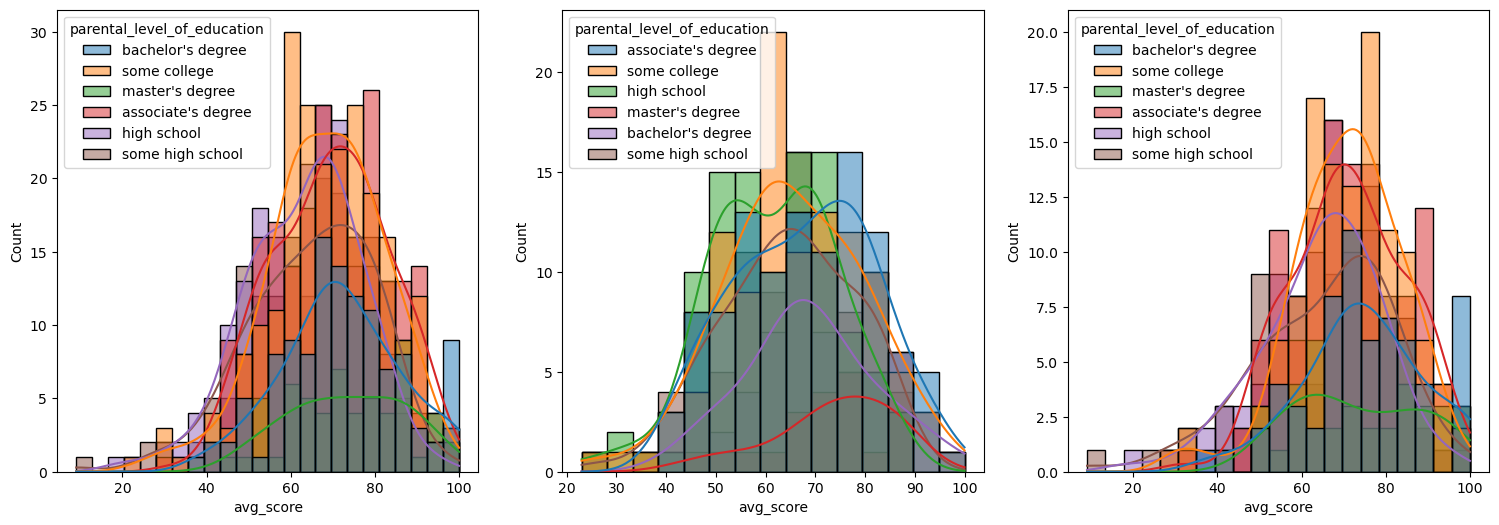

In [19]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data =df1, x = 'avg_score', kde= True, hue = 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data =df1[df1.gender=='male'], x = 'avg_score', kde= True, hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data =df1[df1.gender=='female'], x = 'avg_score', kde= True, hue = 'parental_level_of_education')

# Insights

- In general, parents' education doesn't impact students' performance in exams.
- 2nd plot shows that parent's whose education is of associate's degree or Master's degree, their male child tend to perform well in exam.
- From 3rd plot, we can see there is no effect of parent's education on female students.

<AxesSubplot: xlabel='avg_score', ylabel='Count'>

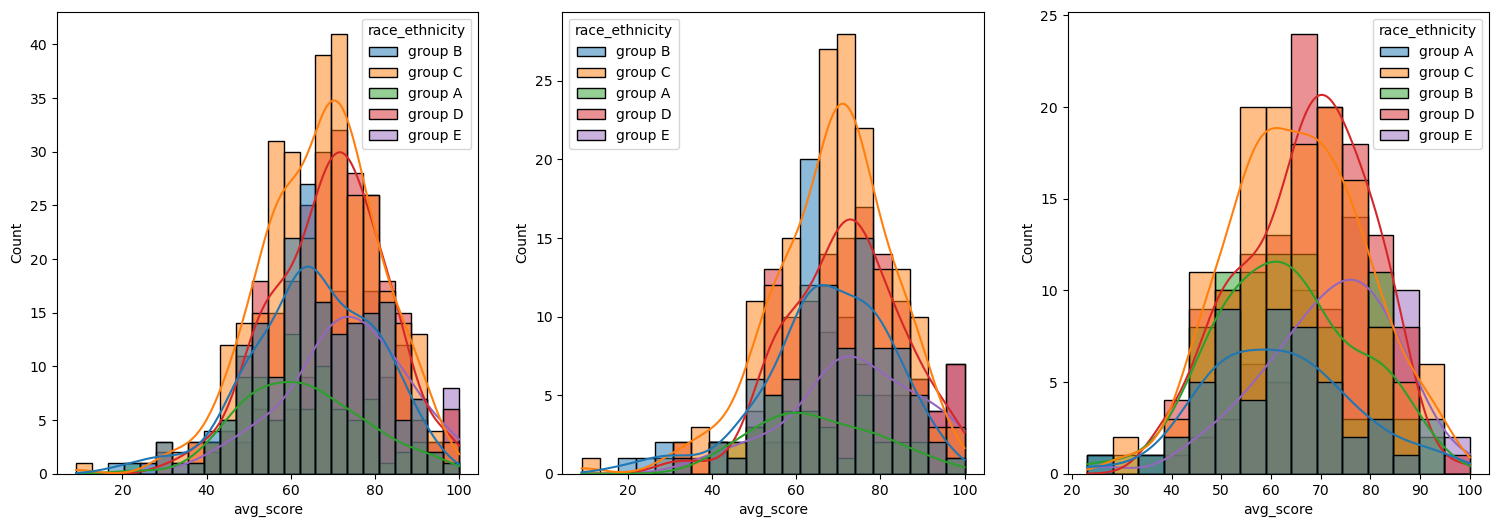

In [20]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data =df1, x = 'avg_score', kde= True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data =df1[df1.gender=='female'], x = 'avg_score', kde= True, hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data =df1[df1.gender=='male'], x = 'avg_score', kde= True, hue = 'race_ethnicity')

# Insights

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of their gender.

In [21]:
# Separate students by gender
male_scores = df1[df1['gender'] == 'male']
female_scores = df1[df1['gender'] == 'female']

from scipy.stats import ttest_ind

In [22]:
# Perform t-tests to compare math, reading, and writing scores by gender

gender_features = ['math_score', 'reading_score', 'writing_score']
for feature in gender_features:
    stat, p_value = ttest_ind(male_scores[feature], female_scores[feature])
    print(f"Feature: {feature}")
    print(f"t-statistic: {stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("There is a significant difference.")
    else:
        print("No significant difference.")

Feature: math_score
t-statistic: 5.38
P-value: 0.0000
There is a significant difference.
Feature: reading_score
t-statistic: -7.96
P-value: 0.0000
There is a significant difference.
Feature: writing_score
t-statistic: -9.98
P-value: 0.0000
There is a significant difference.


In [24]:
# Race/Ethinicity

race_groups = df1["race_ethnicity"].unique()

for group in race_groups:
    group_scores = df1[df1["race_ethnicity"] == group]
    print(f"Race/Ethinicity Group: {group}")

Race/Ethinicity Group: group B
Race/Ethinicity Group: group C
Race/Ethinicity Group: group A
Race/Ethinicity Group: group D
Race/Ethinicity Group: group E


In [27]:
# Perform ANOVA test to compare math, reading, and writing scores among groups
from scipy.stats import f_oneway
for feature in gender_features:
    f_statistic, p_value = f_oneway(        
        group_scores[group_scores["gender"] == "male"][feature],
        group_scores[group_scores["gender"] == "female"][feature]    
    )
    print(f"Feature: {feature}")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("There is a significant difference.")
    else:
        print("No significant difference.")

Feature: math_score
F-statistic: 5.26
P-value: 0.0233
There is a significant difference.
Feature: reading_score
F-statistic: 5.00
P-value: 0.0269
There is a significant difference.
Feature: writing_score
F-statistic: 10.88
P-value: 0.0012
There is a significant difference.


In [29]:
# 4.3 Parental Education
print("\n4.3 Statistical Analysis by Parental Education")

# Group students by parental education
education_levels = df1["parental_level_of_education"].unique()
for level in education_levels:
    level_scores = df1[df1["parental_level_of_education"] == level]
    print(f"Parental Education Level: {level}")
    
    # Perform ANOVA test to compare math, reading, and writing scores among education levels
    for feature in gender_features:
        f_statistic, p_value = f_oneway(
            level_scores[level_scores["gender"] == "male"][feature],
            level_scores[level_scores["gender"] == "female"][feature]
        )
        print(f"Feature: {feature}")
        print(f"F-statistic: {f_statistic:.2f}")
        print(f"P-value: {p_value:.4f}")
        if p_value < 0.05:
            print("There is a significant difference.")
        else:
            print("No significant difference.")


4.3 Statistical Analysis by Parental Education
Parental Education Level: bachelor's degree
Feature: math_score
F-statistic: 0.65
P-value: 0.4205
No significant difference.
Feature: reading_score
F-statistic: 13.46
P-value: 0.0004
There is a significant difference.
Feature: writing_score
F-statistic: 17.81
P-value: 0.0000
There is a significant difference.
Parental Education Level: some college
Feature: math_score
F-statistic: 3.61
P-value: 0.0586
No significant difference.
Feature: reading_score
F-statistic: 22.95
P-value: 0.0000
There is a significant difference.
Feature: writing_score
F-statistic: 34.12
P-value: 0.0000
There is a significant difference.
Parental Education Level: master's degree
Feature: math_score
F-statistic: 4.49
P-value: 0.0384
There is a significant difference.
Feature: reading_score
F-statistic: 1.00
P-value: 0.3218
No significant difference.
Feature: writing_score
F-statistic: 1.91
P-value: 0.1720
No significant difference.
Parental Education Level: associate'

In [30]:
# 4.4 Lunch Type
print("\n4.4 Statistical Analysis by Lunch Type")

# Separate students by lunch type
standard_lunch = df1[df1["lunch"] == "standard"]
free_reduced_lunch = df1[df1["lunch"] == "free/reduced"]

# Perform t-tests to compare math, reading, and writing scores by lunch type
print("Standard Lunch vs. Free/Reduced Lunch")
for feature in gender_features:
    stat, p_value = ttest_ind(standard_lunch[feature], free_reduced_lunch[feature])
    print(f"Feature: {feature}")
    print(f"t-statistic: {stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("There is a significant difference.")
    else:
        print("No significant difference.")


4.4 Statistical Analysis by Lunch Type
Standard Lunch vs. Free/Reduced Lunch
Feature: math_score
t-statistic: 11.84
P-value: 0.0000
There is a significant difference.
Feature: reading_score
t-statistic: 7.45
P-value: 0.0000
There is a significant difference.
Feature: writing_score
t-statistic: 8.01
P-value: 0.0000
There is a significant difference.


In [31]:
# 4.5 Test Preparation Course

# Separate students by test preparation course
completed_prep = df1[df1["test_preparation_course"] == "completed"]
none_prep = df1[df1["test_preparation_course"] == "none"]

# Perform t-tests to compare math, reading, and writing scores by test preparation course
print("Completed Test Preparation vs. No Test Preparation")
for feature in gender_features:
    stat, p_value = ttest_ind(completed_prep[feature], none_prep[feature])
    print(f"Feature: {feature}")
    print(f"t-statistic: {stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("There is a significant difference.")
    else:
        print("No significant difference.")

Completed Test Preparation vs. No Test Preparation
Feature: math_score
t-statistic: 5.70
P-value: 0.0000
There is a significant difference.
Feature: reading_score
t-statistic: 7.87
P-value: 0.0000
There is a significant difference.
Feature: writing_score
t-statistic: 10.41
P-value: 0.0000
There is a significant difference.


In [32]:
#Q4.

numerical_features = [feature for feature in df1.columns if df1[feature].dtype!='O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype=='O']

In [34]:
numerical_features

['math_score', 'reading_score', 'writing_score', 'total_score', 'avg_score']

In [35]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [36]:
# Converting categorical to numerical values using encoding and ensuring numerical features have similar scales.


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [38]:
df1['gender'].unique()

array(['female', 'male'], dtype=object)

In [39]:
df1['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [40]:
df1['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [41]:
label_encoder = LabelEncoder()

In [51]:
df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['lunch'] = label_encoder.fit_transform(df1['lunch'])
df1['test_preparation_course'] = label_encoder.fit_transform(df1['test_preparation_course'])

In [56]:
df1['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [57]:
df1['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [58]:
# Applying One Hot Encoding to these two categories

encoder = OneHotEncoder()

In [67]:
df1_encoded = pd.DataFrame(encoder.fit_transform(df1[['race_ethnicity', 'parental_level_of_education']]).toarray(), columns=encoder.get_feature_names_out())

# df_encoded = pd.DataFrame(encoder.fit_transform(df[['Airline', 'Source', 'Destination']]).toarray(), columns=encoder.get_feature_names_out())

In [69]:
result_df = pd.concat([df1, df1_encoded], axis=1)

In [70]:
result_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score,...,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school
0,0,group B,bachelor's degree,1,1,72,72,74,218,72.666667,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,group C,some college,1,0,69,90,88,247,82.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,group B,master's degree,1,1,90,95,93,278,92.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,group A,associate's degree,0,1,47,57,44,148,49.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,group C,some college,1,1,76,78,75,229,76.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,0,88,99,95,282,94.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,1,group C,high school,0,1,62,55,55,172,57.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,0,group C,high school,0,0,59,71,65,195,65.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,0,group D,some college,1,0,68,78,77,223,74.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
scaler = StandardScaler()
dataframe_encoded = pd.DataFrame(scaler.fit_transform(df1[['math_score', 'reading_score', 'writing_score', 'avg_score', 'total_score']]), columns=scaler.get_feature_names_out())

In [73]:
dataframe_encoded

,math_score,reading_score,writing_score,avg_score,total_score
0,0.390024,0.193999,0.391492,0.343574,0.343574
1,0.192076,1.427476,1.313269,1.021927,1.021927
2,1.577711,1.770109,1.642475,1.747064,1.747064
3,-1.259543,-0.833899,-1.583744,-1.293830,-1.293830
4,0.653954,0.605158,0.457333,0.600881,0.600881
...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1.840630,1.840630
996,-0.269803,-0.970952,-0.859491,-0.732434,-0.732434
997,-0.467751,0.125472,-0.201079,-0.194430,-0.194430
998,0.126093,0.605158,0.589015,0.460532,0.460532


In [74]:
result_df1 = pd.concat([result_df, dataframe_encoded], axis=1)

In [81]:

result_df1.drop('parental_level_of_education', axis =1, inplace=True)

In [82]:
result_df1

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score,race_ethnicity_group A,race_ethnicity_group B,...,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,math_score,reading_score,writing_score,avg_score,total_score
0,0,1,1,72,72,74,218,72.666667,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.390024,0.193999,0.391492,0.343574,0.343574
1,0,1,0,69,90,88,247,82.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.192076,1.427476,1.313269,1.021927,1.021927
2,0,1,1,90,95,93,278,92.666667,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.577711,1.770109,1.642475,1.747064,1.747064
3,1,0,1,47,57,44,148,49.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.259543,-0.833899,-1.583744,-1.293830,-1.293830
4,1,1,1,76,78,75,229,76.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.653954,0.605158,0.457333,0.600881,0.600881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,88,99,95,282,94.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.445746,2.044215,1.774157,1.840630,1.840630
996,1,0,1,62,55,55,172,57.333333,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.269803,-0.970952,-0.859491,-0.732434,-0.732434
997,0,0,0,59,71,65,195,65.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.467751,0.125472,-0.201079,-0.194430,-0.194430
998,0,1,0,68,78,77,223,74.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.126093,0.605158,0.589015,0.460532,0.460532


In [83]:
# Statistical tests to understand feature influence and its relation with the test scores has already been carried out in the previous example.

In [2]:
# Q5 and Q6 are uploaded in different file attached with in this repository.